#### Pandas DataFrame Methods - Part 60

This notebook covers several important DataFrame methods including `eval()`, `ewm()`, `hist()`, `idxmax()`, `idxmin()`, and `infer_objects()`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### DataFrame.eval()

The `eval()` method evaluates a string describing operations on DataFrame columns. It can be used for computational efficiency when evaluating multiple operations.

In [2]:
# Create a sample DataFrame
df = pd.DataFrame({'A': range(1, 6), 'B': range(10, 0, -2)})
df

,A,B
0,1,10
1,2,8
2,3,6
3,4,4
4,5,2


In [3]:
# Using eval to perform operations
df.eval('A + B')

0    11
1    10
2     9
3     8
4     7
dtype: int64

In [4]:
# Assignment is allowed though by default the original DataFrame is not modified
df.eval('C = A + B')

,A,B,C
0,1,10,11
1,2,8,10
2,3,6,9
3,4,4,8
4,5,2,7


In [5]:
# Original DataFrame remains unchanged
df

,A,B
0,1,10
1,2,8
2,3,6
3,4,4
4,5,2


In [6]:
# Use inplace=True to modify the original DataFrame
df.eval('C = A + B', inplace=True)
df

,A,B,C
0,1,10,11
1,2,8,10
2,3,6,9
3,4,4,8
4,5,2,7


##### DataFrame.ewm()

The `ewm()` method provides exponential weighted functions. This is useful for time series analysis.

In [7]:
# Create a sample DataFrame for ewm
df_ewm = pd.DataFrame({'Value': [1, 2, 3, 4, 5]})
df_ewm

,Value
0,1
1,2
2,3
3,4
4,5


In [8]:
# Calculate exponential weighted mean with com parameter
# com: Specify decay in terms of center of mass, α = 1/(1 + com), for com ≥ 0
df_ewm.ewm(com=0.5).mean()

,Value
0,1.000000
1,1.750000
2,2.615385
3,3.550000
4,4.520661


In [9]:
# Calculate exponential weighted mean with span parameter
# span: Specify decay in terms of span, α = 2/(span+1), for span ≥ 1
df_ewm.ewm(span=2).mean()

,Value
0,1.000000
1,1.750000
2,2.615385
3,3.550000
4,4.520661


In [10]:
# Calculate exponential weighted mean with halflife parameter
# halflife: Specify decay in terms of half-life
df_ewm.ewm(halflife=1).mean()

,Value
0,1.000000
1,1.666667
2,2.428571
3,3.266667
4,4.161290


In [11]:
# Calculate exponential weighted mean with alpha parameter
# alpha: Specify smoothing factor α directly, 0 < α ≤ 1
df_ewm.ewm(alpha=0.3).mean()

,Value
0,1.000000
1,1.588235
2,2.232877
3,2.930517
4,3.676788


##### DataFrame.hist()

The `hist()` method makes histograms of the DataFrame's columns.

In [12]:
# Create a sample DataFrame for histogram
df_hist = pd.DataFrame({
    'length': [1.5, 0.5, 1.2, 0.9, 3],
    'width': [0.7, 0.2, 0.15, 0.2, 1.1]
}, index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
df_hist

,length,width
pig,1.5,0.70
rabbit,0.5,0.20
duck,1.2,0.15
chicken,0.9,0.20
horse,3.0,1.10


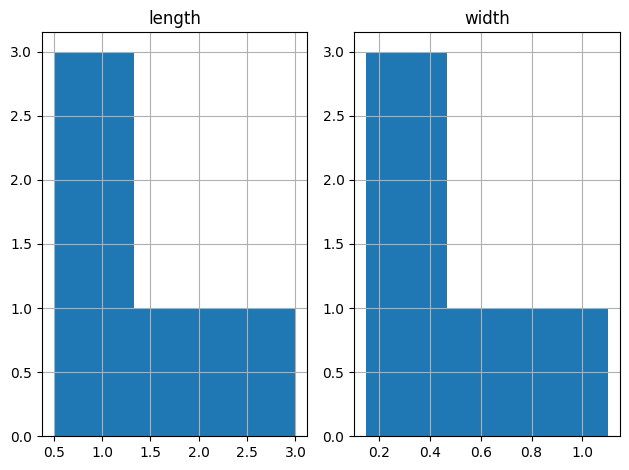

In [13]:
# Create a histogram with 3 bins
hist = df_hist.hist(bins=3)
plt.tight_layout()

##### DataFrame.idxmax() and DataFrame.idxmin()

The `idxmax()` method returns the index of the first occurrence of the maximum value over the requested axis.
The `idxmin()` method returns the index of the first occurrence of the minimum value over the requested axis.

In [14]:
# Create a sample DataFrame
df_idx = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 8, 6, 4, 2],
    'C': [5, 3, 8, 2, 1]
})
df_idx

,A,B,C
0,1,10,5
1,2,8,3
2,3,6,8
3,4,4,2
4,5,2,1


In [15]:
# Find index of maximum value in each column
df_idx.idxmax(axis=0)

A    4
B    0
C    2
dtype: int64

In [16]:
# Find index of maximum value in each row
df_idx.idxmax(axis=1)

0    B
1    B
2    C
3    A
4    A
dtype: object

In [17]:
# Find index of minimum value in each column
df_idx.idxmin(axis=0)

A    0
B    4
C    4
dtype: int64

In [18]:
# Find index of minimum value in each row
df_idx.idxmin(axis=1)

0    A
1    A
2    A
3    C
4    C
dtype: object

##### DataFrame.infer_objects()

The `infer_objects()` method attempts to infer better dtypes for object columns.

In [19]:
# Create a DataFrame with mixed types
df_infer = pd.DataFrame({"A": ["a", 1, 2, 3]})
df_infer

,A
0,a
1,1
2,2
3,3


In [20]:
# Check the data types
df_infer.dtypes

A    object
dtype: object

In [21]:
# Remove the string value
df_infer = df_infer.iloc[1:]
df_infer

,A
1,1
2,2
3,3


In [22]:
# Check the data types - still object
df_infer.dtypes

A    object
dtype: object

In [23]:
# Use infer_objects to convert to better dtypes
df_infer_converted = df_infer.infer_objects()
df_infer_converted.dtypes

A    int64
dtype: object